# Classwork 6
Quinn Gates
### Derivative
A function $derivative(a,b,n)$ takes three input parameters, the two endpoints of the domain $[a,b]$ on which the derivative acts and the number of points $n$ into which that domain is partitioned (yielding $n-1$ intervals), and returns a single two-dimensional numpy array $D$ of dimension $n\times n$ that represents the finite difference operation. Done correctly, given a discrete function approximation represented by an $n$-dimensional array $f = [f_0, \ldots, f_{n-1}]$ defined as $f_i = f(x_i)$ on the grid of points $x_i$ from $i=0$ to $i=n$ with fixed spacing $x_{i+1} - x_i = dx$, where $dx = (b-a)/(n-1)$, applying the central difference matrix should yield a new $n$-dimensional array $Df = [(Df)0, \ldots, (DF){n-1}]$ with interior points: $$(Df)i = \frac{f_{i+1} - f_{i-1}}{2dx}.$$

We need to end up with a matrix that, when mulitplied by an array of $y$-values, produces the array: 
$$ D  f = \left( \begin{array}{ccc}
(f_2-f_1)/\delta x \\
(f_3-f_1)/2\delta x \\
(f_4-f_2)/2\delta x \\
\ldots \\
(f_n-f_\left(n-2\right))/2\delta x  \\
(f_n-f_\left(n-1\right))/\delta x\end{array} \right)$$

I will show how the D matirx is made using a $5\times5$ matrix so we need:
$$  \left( \begin{array}{ccc}
a & b & c & d & e \\
f & g & h & i & j \\
k & l & m & n & o \\
p & q & r & s & t \\
u & v & w & x & y \end{array} \right) \left(\begin{array}{ccc}
f_1 \\
f_2 \\
f_3 \\
f_4 \\
f_5 \end{array} \right) = \left( \begin{array}{ccc}
(f_2-f_1)/\delta x \\
(f_3-f_1)/2\delta x \\
(f_4-f_2)/2\delta x \\
(f_5-f_3)/2\delta x  \\
(f_5-f_4)/\delta x\end{array} \right) $$

We can use this now to reverse engineer the $D$-array.  Since the first line of the product contains only $f_2$ and $f_1$ we know that $c=d=e=0$.  This logic can be applied to each line so that $c=d=e=g=i=j=k=m=o=p=q=s=u=v=w=0$.  Therefore:
$$ D = \left( \begin{array}{ccc}
a & b & 0 & 0 & 0 \\
f & 0 & h & 0 & 0 \\
0 & l & 0 & n & 0 \\
0 & 0 & r & 0 & t \\
0 & 0 & 0 & x & y \end{array} \right) $$

Now it's just finding out what the remaining varialbles are.  If the whole matrix is getting divided by $2\delta x$ then the top and bottom lines need to be double the pattern in the rest of the matrix.  Since the general function we are trying to achieve is: $f_n-f_\left(n-2\right)$ so we need to have a diagonal of $1's$ that is displaced by one spot higher than the identity matrix and a diagnal of $-1's$ that is displaced by one spot lower than the identity matrix.  This results in the matrix:
$$ D = \left( \begin{array}{ccc}
a & 2 & 0 & 0 & 0 \\
-1 & 0 & 1 & 0 & 0 \\
0 & -1 & 0 & 1 & 0 \\
0 & 0 & -1 & 0 & 1 \\
0 & 0 & 0 & -2 & y \end{array} \right) $$

The last points to define are now $a$ and $y$.  In order to get the function to work properly, $a$ must equal $-2$ and $y$ must equal $2$ so that when divided by $2\delta x$ the first line is $2(f_2-f_1)/2\delta x = (f_2-f_1)/\delta x$.  Therefore, the symmetric difference matrix is:
$$ D = \left( \begin{array}{ccc}
-2 & 2 & 0 & 0 & 0 \\
-1 & 0 & 1 & 0 & 0 \\
0 & -1 & 0 & 1 & 0 \\
0 & 0 & -1 & 0 & 1 \\
0 & 0 & 0 & -2 & 2 \end{array} \right)/2\delta x $$

Now we will plot the test functions: $f(x) = x^2$, $s(x) = \sin(x)$, and $g(x) = \exp(-x^2/2)/\sqrt{2\pi}$. 

In [14]:
import array_calculus as ac
import numpy as np
import matplotlib.pyplot as plt

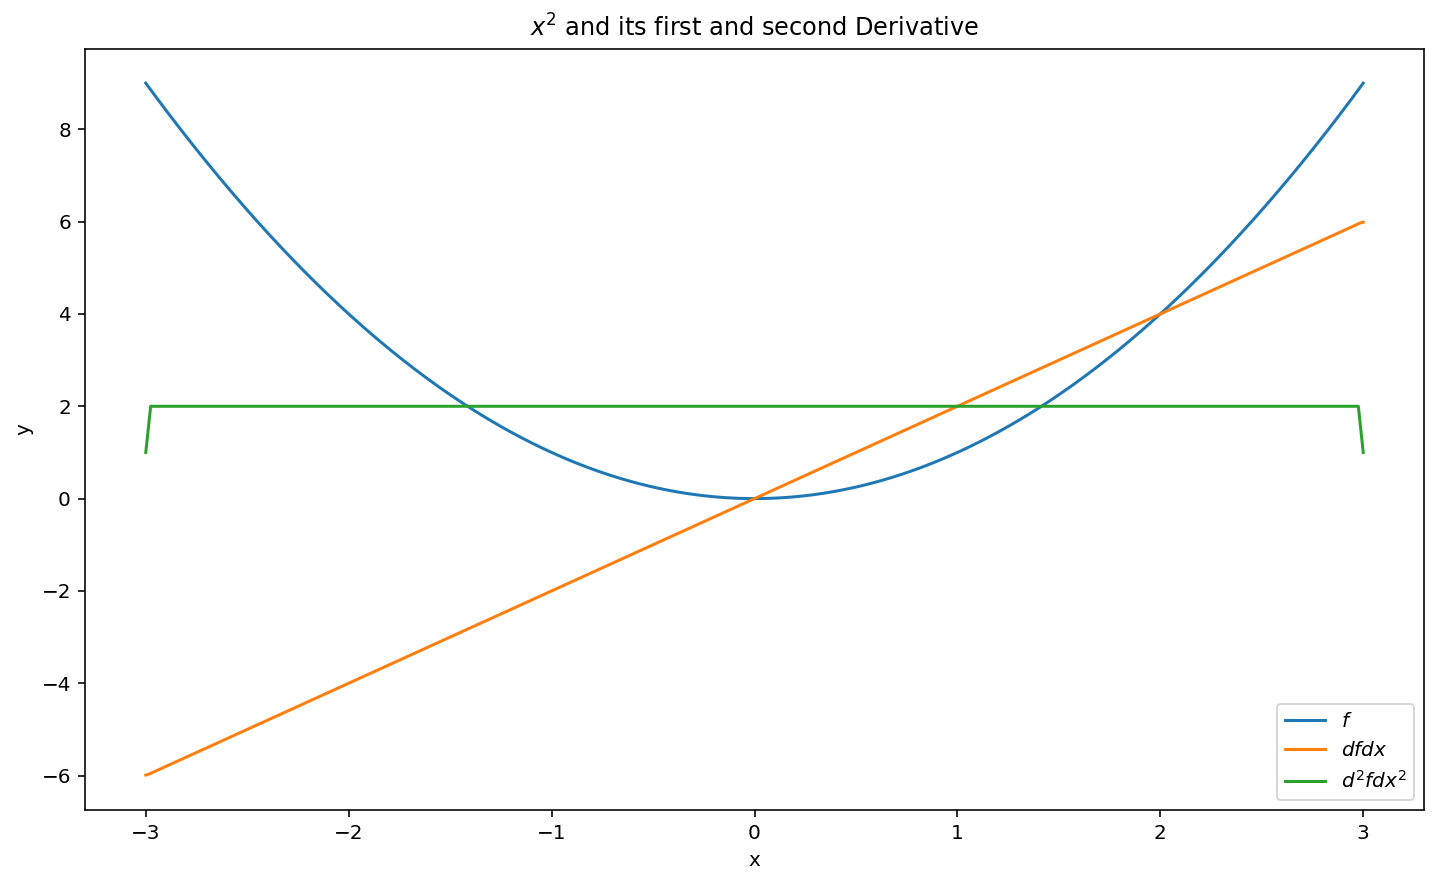

In [4]:
x,f = ac.gen_xsqr_array(-3,3,500)
ac.plot(ac.derivative(-3,3,500),ac.second_derivative(-3,3,500),x,f,title=r'$x^2$ and its first and second Derivative')

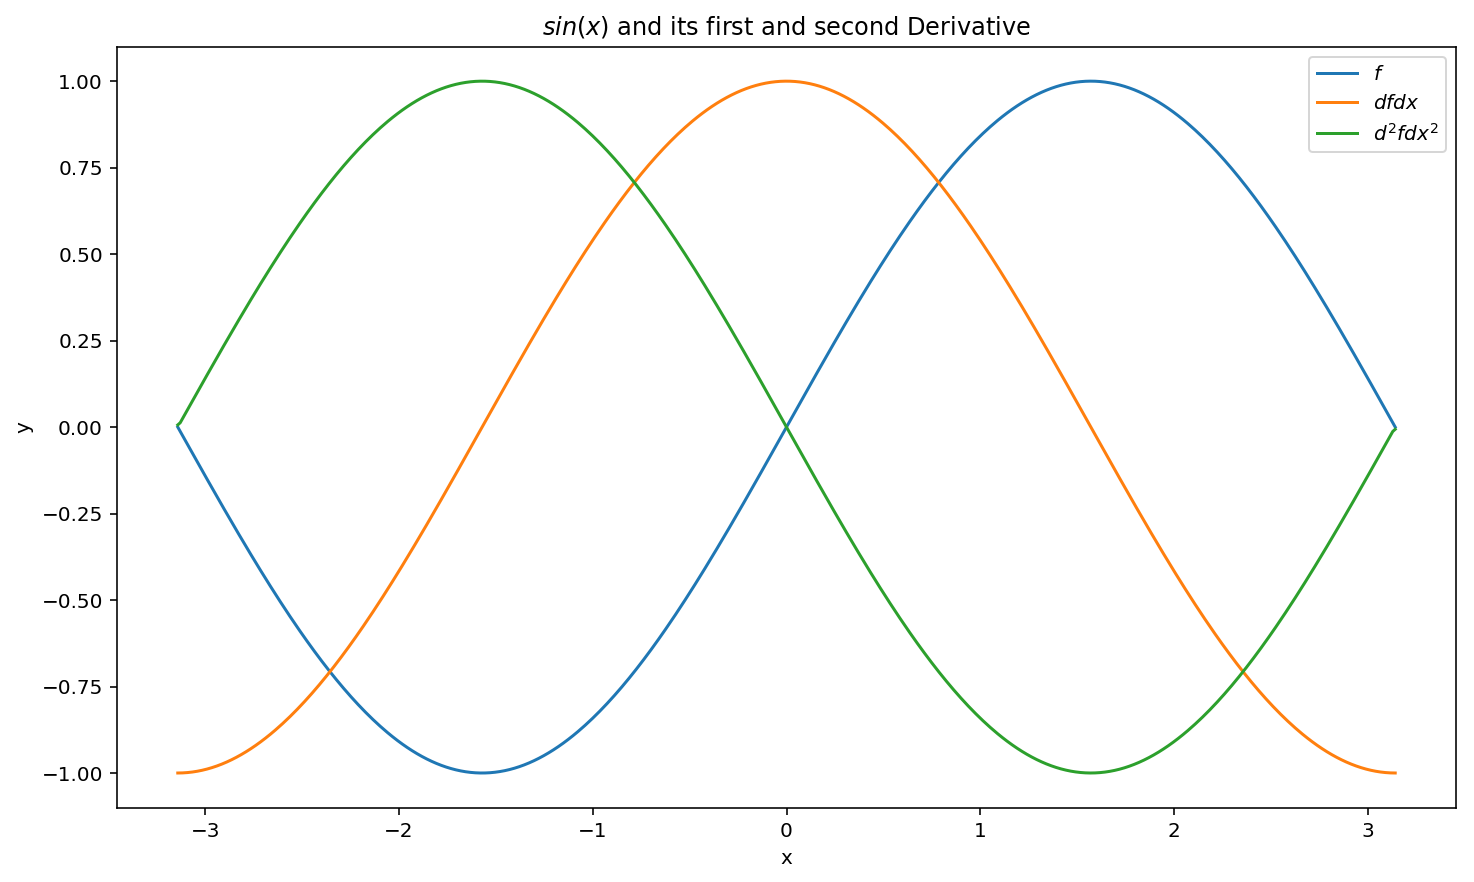

In [5]:
x,f = ac.gen_sin_array(-np.pi,np.pi,500)
ac.plot(ac.derivative(-np.pi,np.pi,500),ac.second_derivative(-np.pi,np.pi,500),x,f,title=r'$sin(x)$ and its first and second Derivative')

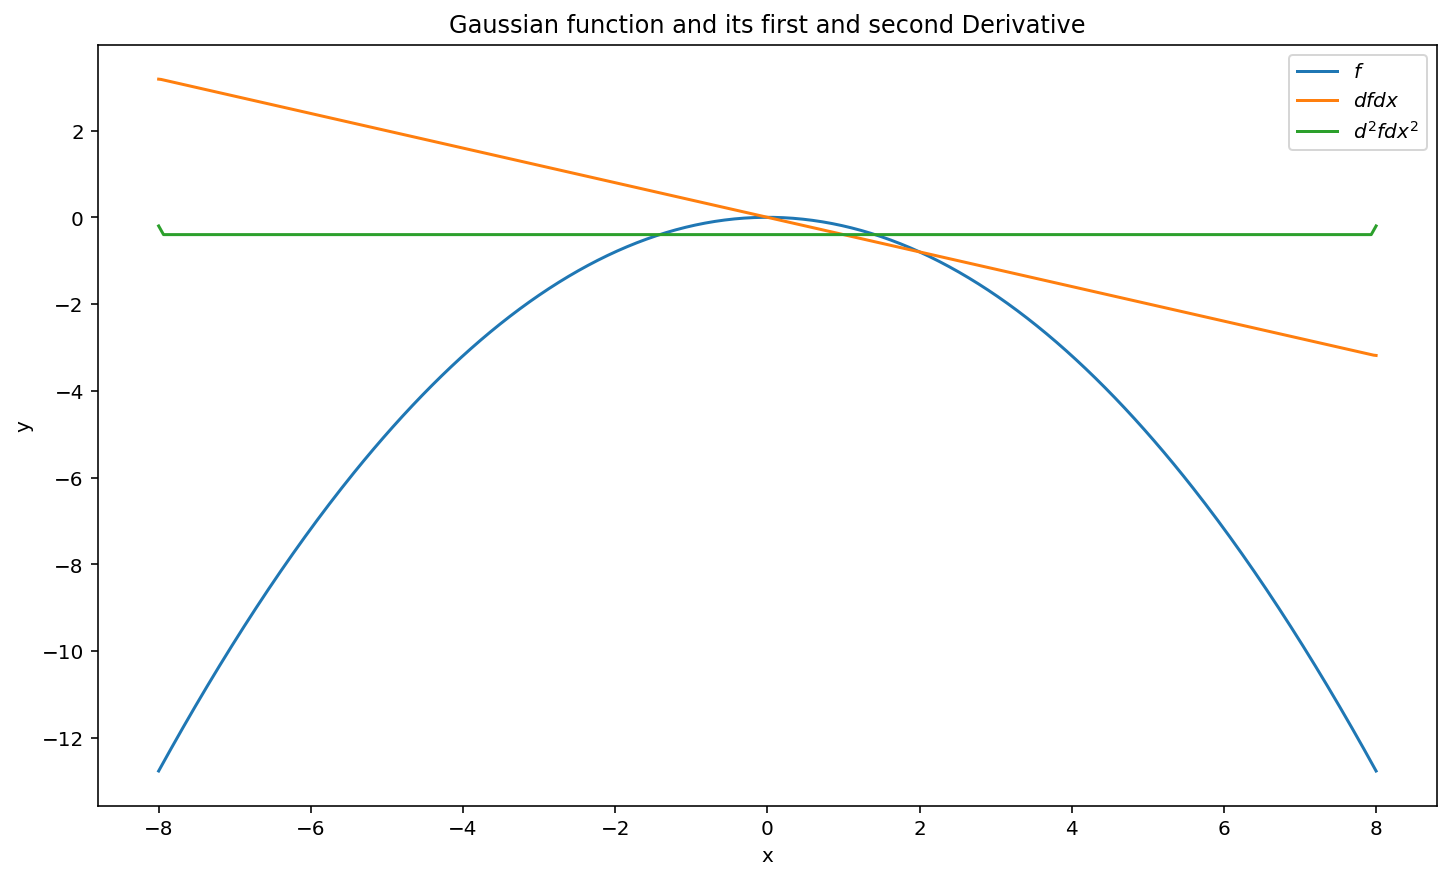

In [6]:
x,f = ac.gen_gaus_array(-8,8,500)
ac.plot(ac.derivative(-8,8,500),ac.second_derivative(-8,8,500),x,f,title=r'Gaussian function and its first and second Derivative')

### Second Derivative
A function second_derivative(a,b,n) returns a second-order derivative matrix $D2$ using the explicit second-order different formulas.
The array of second derivative $y$-values should have the values:
$$ \lim_{\delta x\to0} (2Df)i = \frac{f_{i+1}-2f_i+f_{i-1}}{\delta x^2} $$

The goal this time is to get a matrix that, when multiplied by an array of $y$-values, returns the second derivative of the function at each point.  So we need to end with the array:
$$ D_2  f = \left( \begin{array}{ccc}
(2f_1-4f_2+2f_3)/4\delta x^2 \\
(2f_1-3f_2+f4)/4\delta x^2 \\
(f_1-2f_3+f_5)/4\delta x^2 \\
(f_2-2f_4+f_6)/4\delta x^2 \\
\ldots \\
(f_{n-1}-2f_{n-3}+f_{n-5})/4\delta x^2  \\
(f_n-2f_{n-2}+f_{n-4})/4\delta x^2  \\
(2f_n-3f_{n-1}+f_{n-3})/4\delta x^2  \\
(2f_n-4f_{n-1}+2f_{n-2})/4\delta x^2  \end{array} \right)$$

I will show how the D matirx is made using a $5\times5$ matrix so we need:
$$  \left( \begin{array}{ccc}
a & b & c & d & e \\
f & g & h & i & j \\
k & l & m & n & o \\
p & q & r & s & t \\
u & v & w & x & y \end{array} \right) \left(\begin{array}{ccc}
f_1 \\
f_2 \\
f_3 \\
f_4 \\
f_5 \end{array} \right) = \left( \begin{array}{ccc}
(2f_1-4f_2+2f_3)/4\delta x^2 \\
(2f_1-3f_2+f_4)/4\delta x^2 \\
(f_1-2f_3+f_5)/4\delta x^2 \\
(2f_5-3f_4+f_2)/4\delta x^2 \\
(2f_5-4f_4+2f_3)/4\delta x^2  \end{array} \right)$$

We can use this now to reverse engineer the $2D$-array.  Since the first line of the product contains only $f_2$ and $f_1$ we know that $c=d=e=0$.  This logic can be applied to each line so that $d=e=h=j=l=n=p=r=u=v=0$.  Therefore:
$$ D_2 = \left( \begin{array}{ccc}
a & b & c & 0 & 0 \\
f & g & 0 & i & 0 \\
k & 0 & m & 0 & o \\
0 & q & 0 & s & t \\
0 & 0 & w & x & y \end{array} \right) $$

Now it's just finding out what the remaining varialbles are.  Since the general function we are trying to achieve is: $(f_{a-1}-2f_{a-3}+f_{a-5})$ so we need to have a diagonal of $1's$ that is displaced by 2 spots higher than the identity matrix, a diagnal of $1's$ that is displaced by 2 spots lower than the identity matrix, and a diagonal of $-2$'s going down the middle diagonal.  This results in the matrix:
$$ D_2 = \left( \begin{array}{ccc}
a & b & c & 0 & 0 \\
f & g & 0 & i & 0 \\
1 & 0 & -2 & 0 & 1 \\
0 & q & 0 & s & t \\
0 & 0 & w & x & y \end{array} \right) $$
Where the middle line is translated down the diagonal

The funtion is slightly different at the endpoints so the first 2 lines and the back 2 lines do not follow the pattern.  We will used the product we are looking for to get the first and last 2 lines made:
$$ D_2 = \left( \begin{array}{ccc}
2 & -4 & 2 & 0 & 0 \\
2 & -3 & 0 & 1 & 0 \\
1 & 0 & -2 & 0 & 1 \\
0 & 1 & 0 & -3 & 2 \\
0 & 0 & 2 & -4 & 2 \end{array} \right) $$

Therefore, the second order symmetric differnece array is:
$$ D_2 = \left( \begin{array}{ccc}
2 & -4 & 2 & 0 & 0 \\
2 & -3 & 0 & 1 & 0 \\
1 & 0 & -2 & 0 & 1 \\
0 & 1 & 0 & -3 & 2 \\
0 & 0 & 2 & -4 & 2 \end{array} \right)/4\delta x^2 $$

Unsuprisingly, $D_2$ is actually equivalent to multiplying $D$ by itself!

In [7]:
ac.derivative(0,10,11) @ ac.derivative(0,10,11) == ac.second_derivative(0,10,11)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  Tr

It is also possible to make a function that produces the first symmetric difference matrix that does not require there to be equal spacing between the $x$-coordinates.  I did have to use a $for$loop to do so thought it must be possible to make a function that does not use a $for$loop.  It takes the $x$-coordinate array in as an input and produces the symmetric difference array.

First, I will show that the function works with an evenly spaced array:

In [8]:
ac.mesh_derivative(np.linspace(0,9,10))

array([[-1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  1. ]])

And now an array that is not evenly spaced:

In [12]:
ac.mesh_derivative(np.array([0,2,4,8,10,16,18,22]))

array([[-0.5       ,  0.5       ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.25      ,  0.        ,  0.25      ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.16666667,  0.        ,  0.16666667,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.16666667,  0.        ,  0.16666667,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.125     ,  0.        ,
         0.125     ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.125     ,
         0.        ,  0.125     ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.16666667,  0.        ,  0.16666667],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.25      ,  0.25      ]])

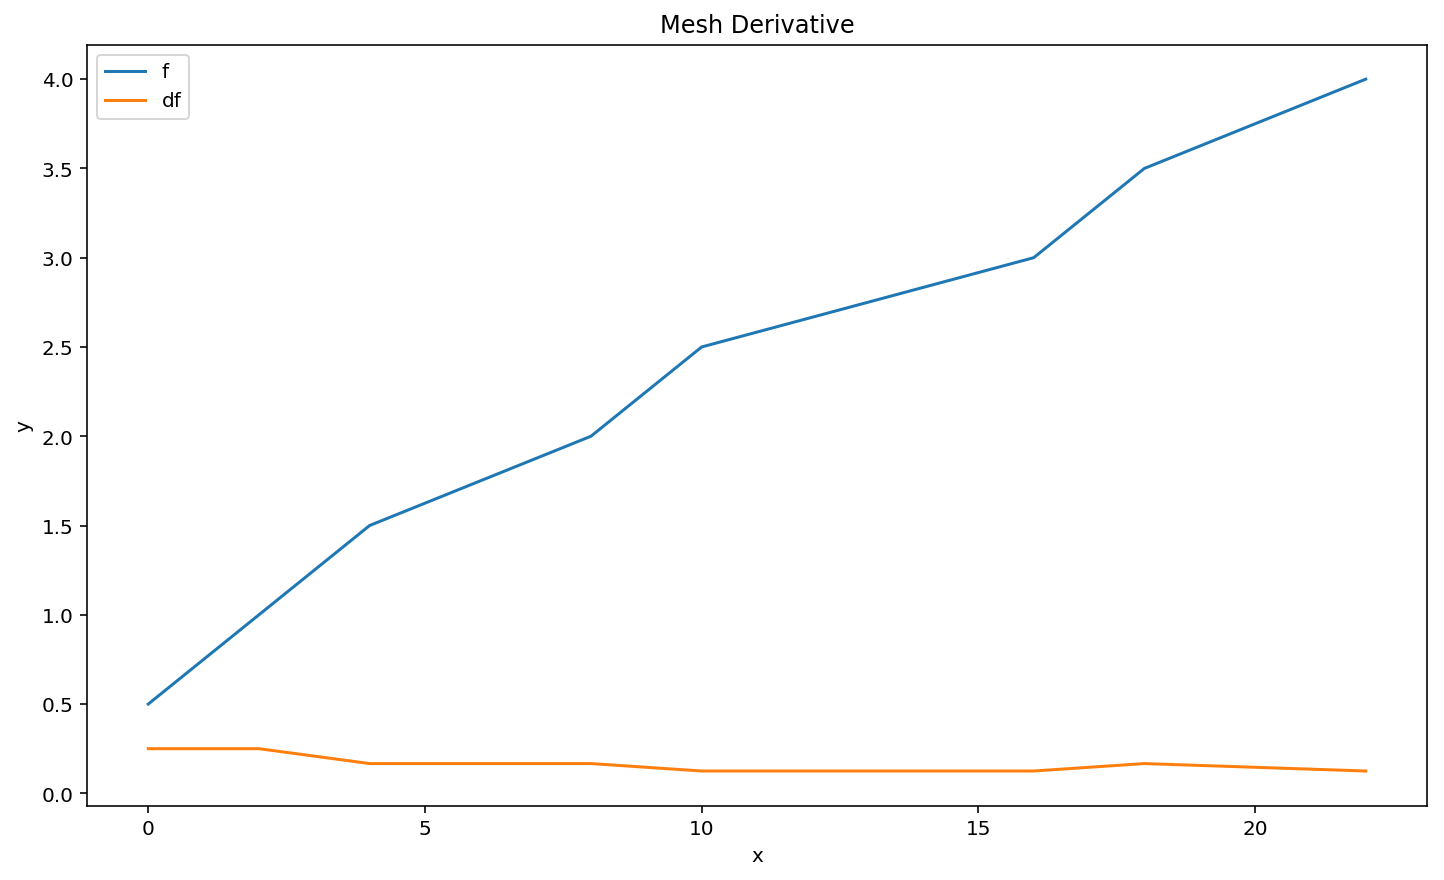

In [18]:
plt.plot([0,2,4,8,10,16,18,22],([.5,1,1.5,2,2.5,3,3.5,4]))
plt.plot([0,2,4,8,10,16,18,22],ac.mesh_derivative(np.array([0,2,4,8,10,16,18,22]))@[.5,1,1.5,2,2.5,3,3.5,4])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['f','df'])
plt.title('Mesh Derivative')
plt.show()